In [27]:
!pip install missingno

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


# Dataset EdStatsCountry

### read data and check informations

In [2]:

df_two = pd.read_csv("EdStatsCountry.csv", sep = ',')
pd.set_option('display.max_columns', None)
df_two.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [11]:
df_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [14]:
df_two.shape

(241, 32)

## Use missingno to display null values

### visualize null values

### bar chart of missing values

<AxesSubplot:>

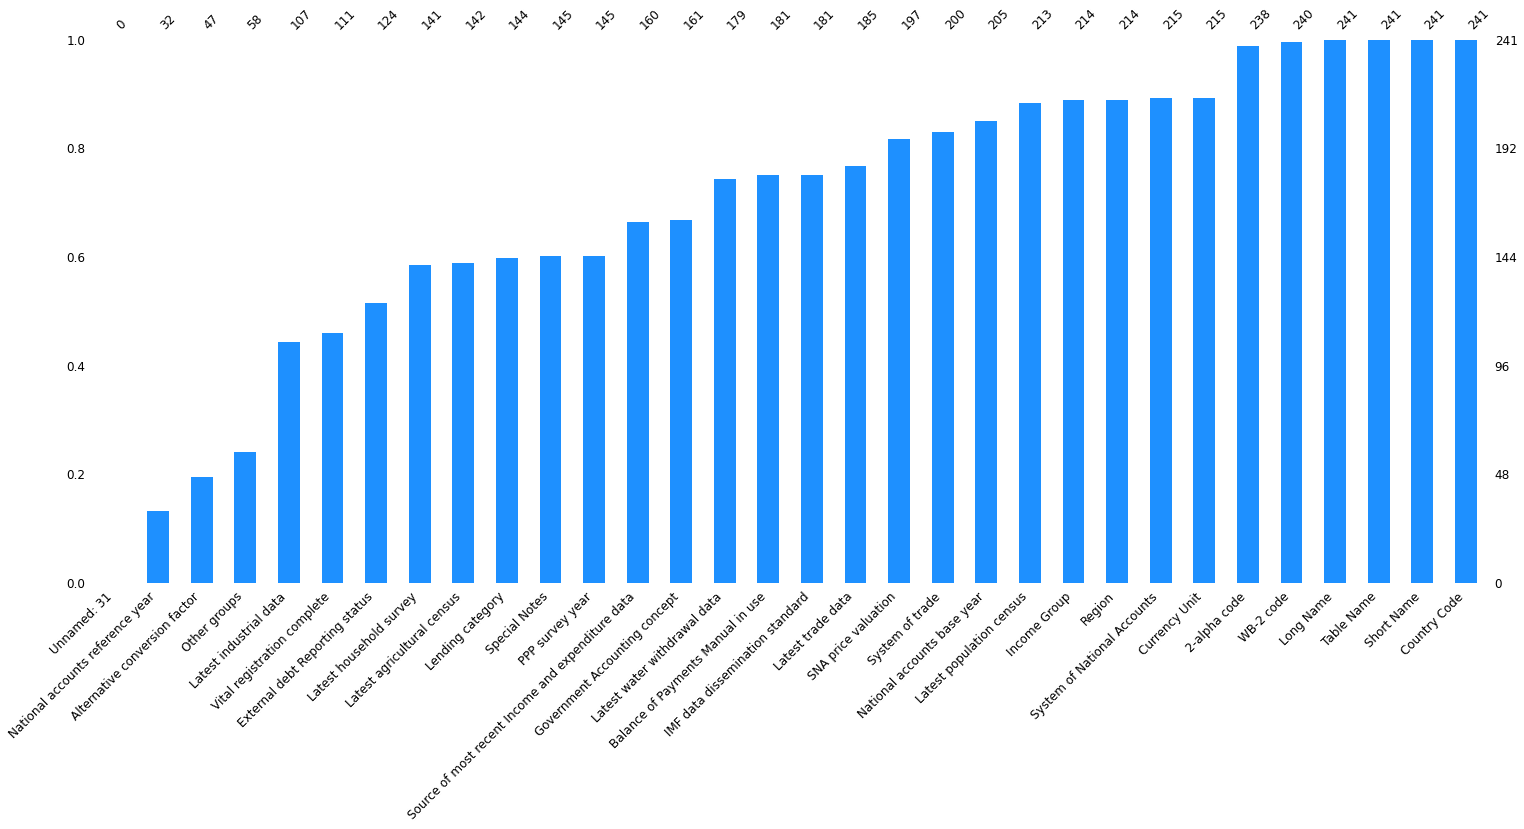

In [44]:
msno.bar(df_two,color="dodgerblue", sort="ascending", fontsize=12)

### position of missing values

<AxesSubplot:>

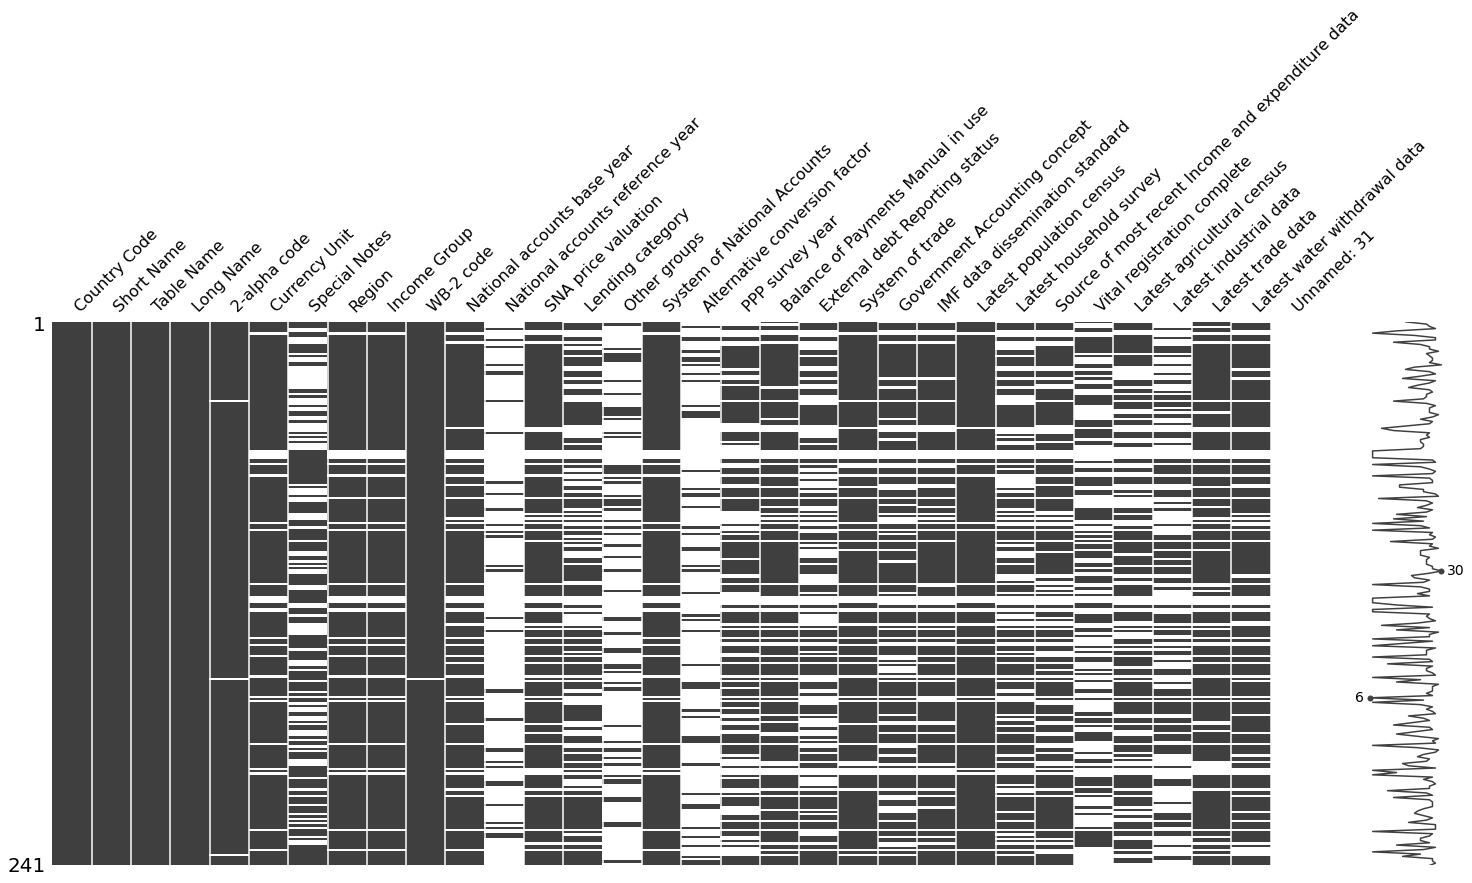

In [31]:
msno.matrix(df_two)

### heatmap of missing values

<AxesSubplot:>

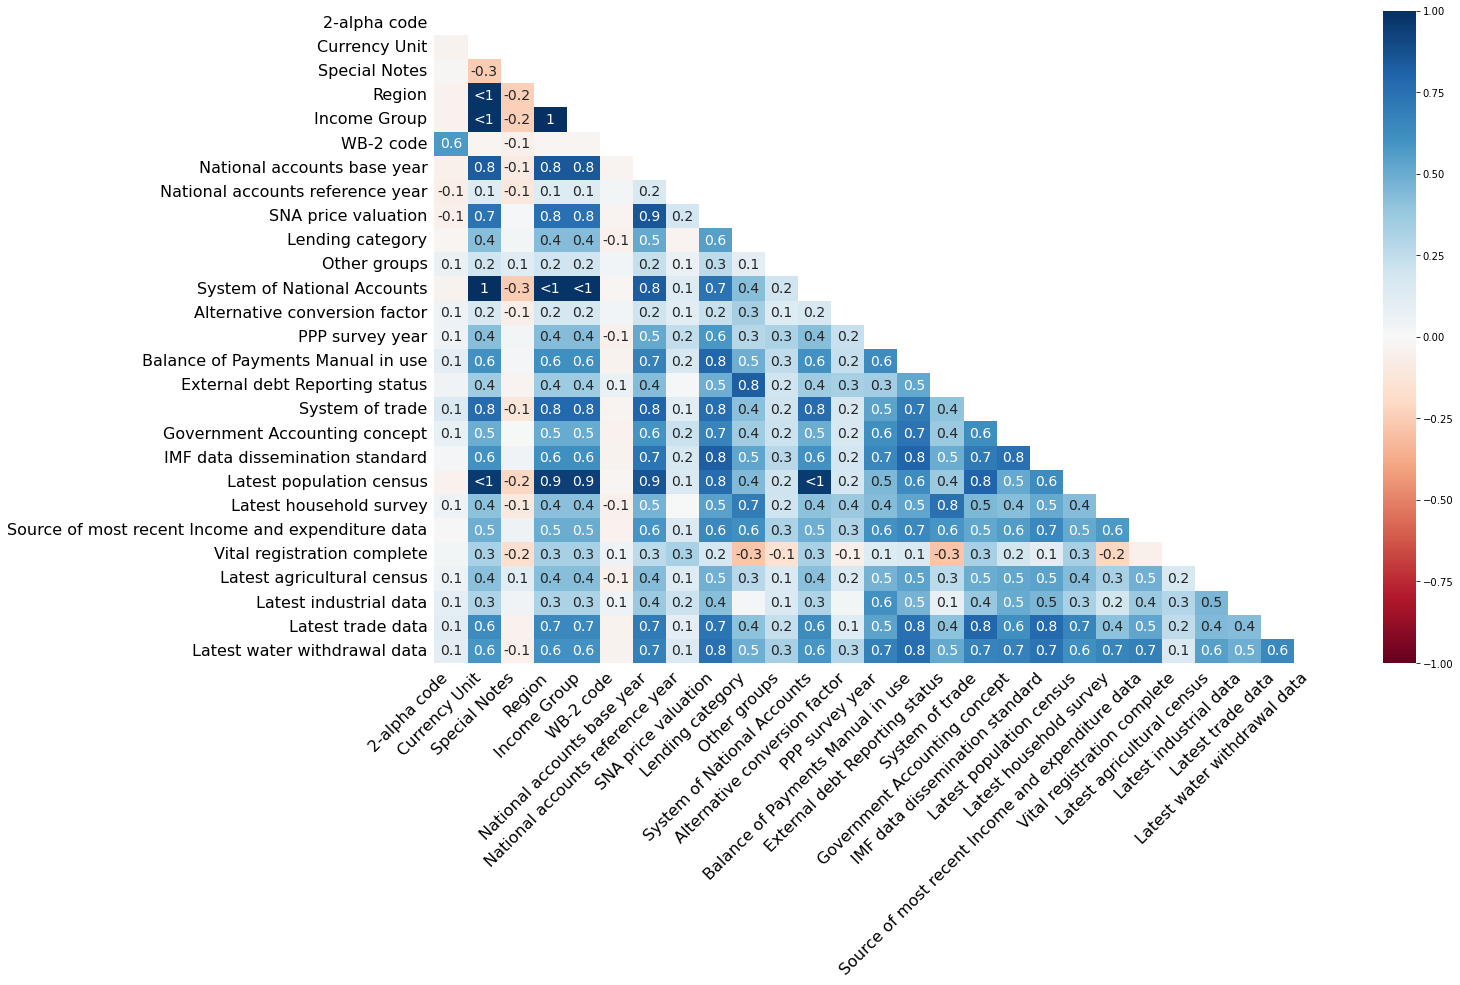

In [32]:
msno.heatmap(df_two)

### check the las_census population

In [13]:
df_two["Latest population census"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 241 entries, 0 to 240
Series name: Latest population census
Non-Null Count  Dtype 
--------------  ----- 
213 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


In [19]:
df_two["Latest population census"]  = pd.to_numeric(df_two["Latest population census"].str.replace('[^\d.]', ''), errors='coerce')

C:\Users\naoue\AppData\Local\Temp\ipykernel_9840\2034321926.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_two["Latest population census"]  = pd.to_numeric(df_two["Latest population census"].str.replace('[^\d.]', ''), errors='coerce')


In [20]:
df_two["Latest population census"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 241 entries, 0 to 240
Series name: Latest population census
Non-Null Count  Dtype  
--------------  -----  
208 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


In [63]:
df_two["Latest population census"].value_counts()

2011.0        59
2010.0        49
2012.0        18
2009.0        14
2008.0         9
2007.0         9
2013.0         8
2006.0         8
2004.0         7
2002.0         5
2005.0         4
2003.0         3
1984.0         2
1998.0         2
1970.0         2
1979.0         1
20092011.0     1
1996.0         1
1997.0         1
1993.0         1
1983.0         1
1987.0         1
2001.0         1
1989.0         1
Name: Latest population census, dtype: int64

   ###  check informations by column

In [61]:
df_two['Country Code'].value_counts()

ABW    1
LCA    1
MRT    1
MUS    1
MWI    1
      ..
GRL    1
GTM    1
GUM    1
GUY    1
ZWE    1
Name: Country Code, Length: 241, dtype: int64

In [62]:
df_two['Income Group'].value_counts()

Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
Name: Income Group, dtype: int64

# Dataset EdStatsData

### import and read data

In [2]:
df_three= pd.read_csv("EdStatsData.csv",sep = ',')

In [3]:
df_three.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_three.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

### compare between dataset

In [10]:
df_three['Country Code'].equals(df_one['CountryCode'])

False

In [11]:
df_three['Country Code'].equals(df_two['Country Code'])

False

In [19]:
df_three['Country Code'].isin (df_two['Country Code'])

0         True
1         True
2         True
3         True
4         True
          ... 
886925    True
886926    True
886927    True
886928    True
886929    True
Name: Country Code, Length: 886930, dtype: bool

In [21]:
df_two['Country Code'].isin(df_one['CountryCode'])

0      True
1      True
2      True
3      True
4      True
       ... 
236    True
237    True
238    True
239    True
240    True
Name: Country Code, Length: 241, dtype: bool

### check stats

In [39]:
df_three.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,8.912200e+04,3.877700e+04,3.751100e+04,3.846000e+04,3.860600e+04,9.029600e+04,3.937200e+04,3.864100e+04,3.855200e+04,3.754000e+04,1.244050e+05,7.443700e+04,7.554300e+04,7.579300e+04,7.746200e+04,1.313610e+05,7.680700e+04,7.345300e+04,8.491400e+04,1.188390e+05,1.766760e+05,1.235090e+05,1.242050e+05,1.303630e+05,1.288140e+05,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,3.283898e+09,7.664969e+09,7.913722e+09,7.856908e+09,8.118002e+09,3.622763e+09,9.156550e+09,1.014901e+10,1.104709e+10,1.195436e+10,9.084424e+09,1.571674e+10,1.604668e+10,1.643532e+10,1.684022e+10,1.052543e+10,1.874630e+10,2.027385e+10,1.794678e+10,1.331558e+10,9.423384e+09,1.384867e+10,1.428299e+10,1.449393e+10,1.589729e+10,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02,6.054774e+02,6.315916e+02,6.556516e+02,6.751516e+02,6.911287e+02,7.040640e+02,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,1.780774e+11,2.744142e+11,2.790549e+11,2.823809e+11,2.940635e+11,2.002929e+11,3.264675e+11,3.535351e+11,3.804257e+11,4.014873e+11,3.665667e+11,4.881357e+11,5.012055e+11,5.121962e+11,5.292982e+11,4.285218e+11,5.812586e+11,6.142357e+11,5.859148e+11,5.153472e+11,4.442374e+11,5.449242e+11,5.622886e+11,5.803607e+11,6.278337e+11,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04,1.577305e+04,1.678556e+04,1.778666e+04,1.874408e+04,1.965409e+04,2.052941e+04,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,-1.404240e+00,-1.478345e+00,-2.358765e+00,-2.867273e+00,-2.800548e+00,-2.216315e+00,-1.556722e+00,-1.410886e+00,-1.425202e+00,-1.562425e+00,-1.803750e+00,-5.814339e+00,-5.089333e+00,-6.184857e+00,-4.792691e+00,-2.697722e+00,-3.820174e+00,-2.517245e+00,-6.086200e+04,-6.526000e+04,-6.759300e+04,-6.973700e+04,-9.214300e+04,-1.111860e+05,-1.262600e+05,-1.347240e+05,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00,-1.797539e+00,1.000000,-1.870000e+00,-2.000000e+00,-2.110000e+00,-2.150000e+00,-2.140000e+00,-2.090000e+00,-1.980000e+00,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,1.770000e+00,9.468690e+00,9.989330e+00,9.581825e+00,9.068048e+0

### check and visualize null values 

In [4]:
df_three.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

### use bar function

<AxesSubplot:>

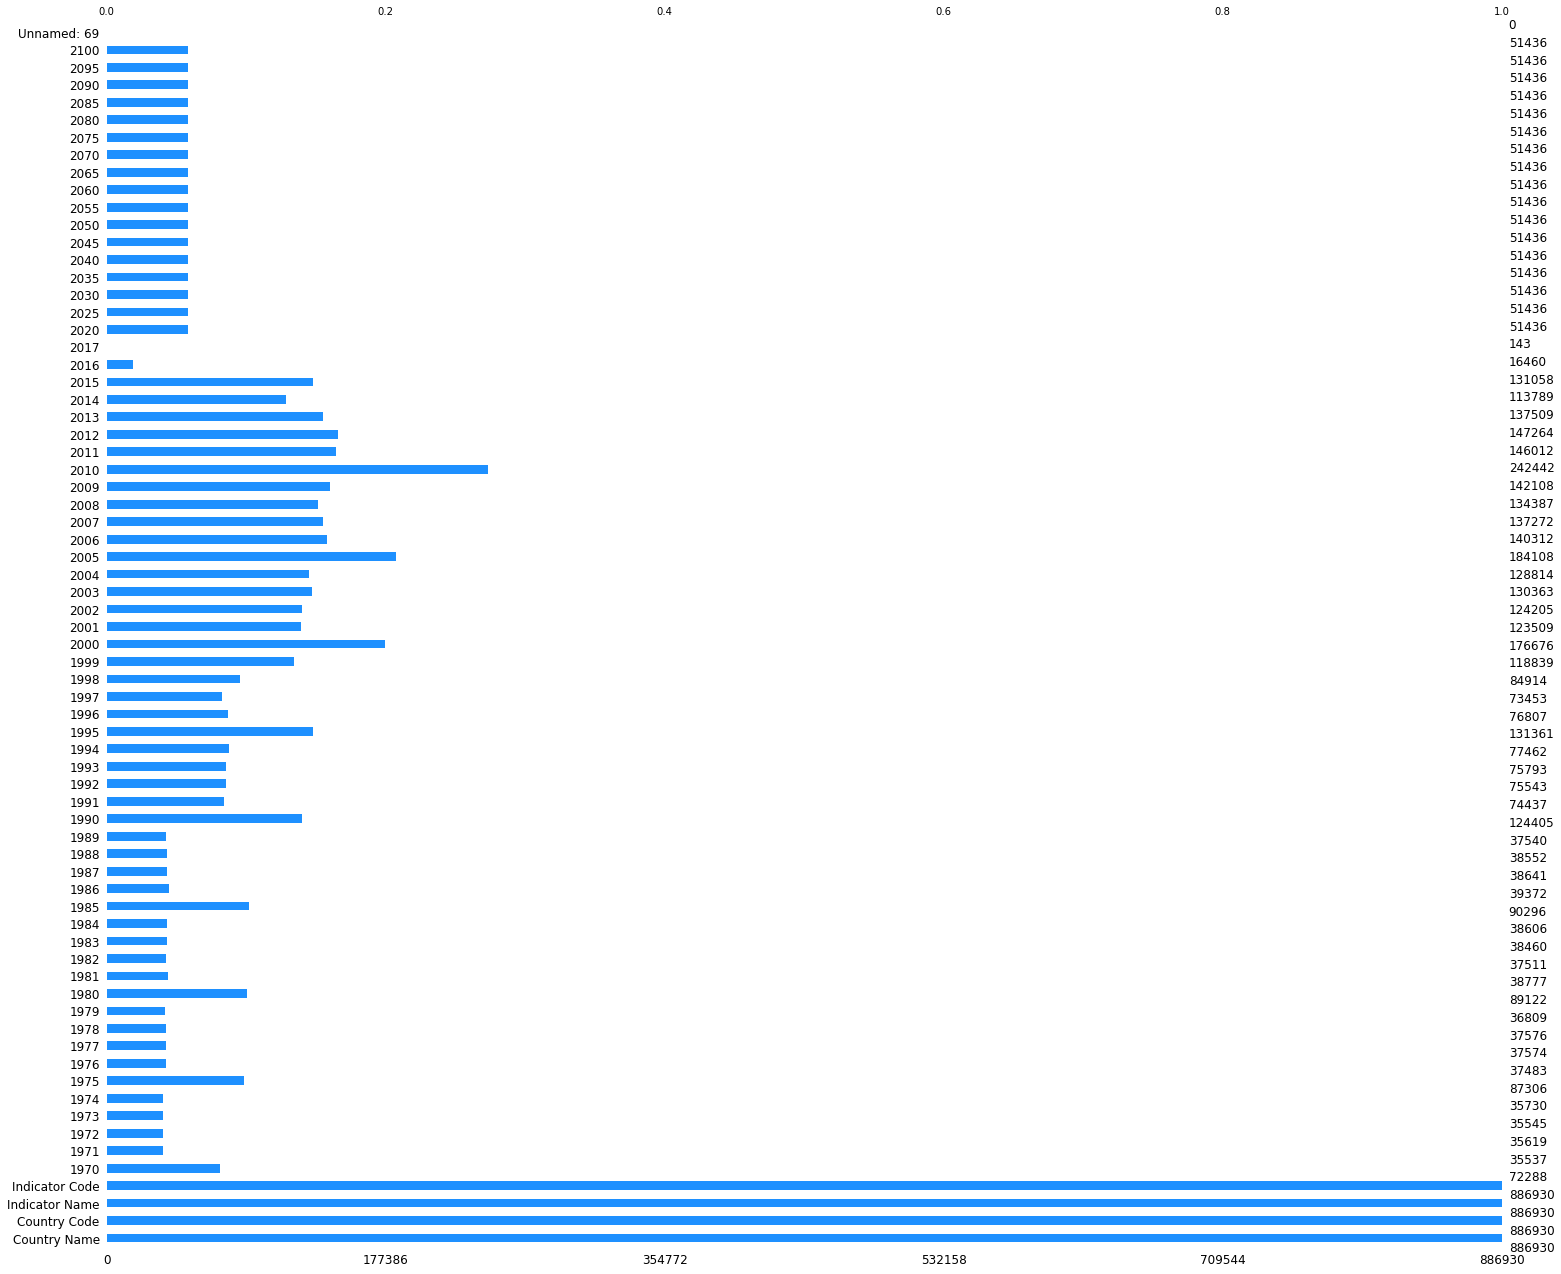

In [7]:
msno.bar(df_three,color="dodgerblue", fontsize=12)

In [34]:
null_percentage = df_three.isnull().sum()/df_three.shape[0]*100  # percentage of null in every column

In [35]:
null_percentage

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
                     ...    
2085               94.200670
2090               94.200670
2095               94.200670
2100               94.200670
Unnamed: 69       100.000000
Length: 70, dtype: float64

In [41]:
col_to_drop = null_percentage[null_percentage> 80].keys() #list column with more than 60% of null values

In [42]:
col_to_drop

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2006',
       '2007', '2008', '2009', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055',
       '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100',
       'Unnamed: 69'],
      dtype='object')

In [43]:
df_three_droped = df_three.drop(col_to_drop, axis = 1)

In [44]:
df_three_droped

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2010
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,82.489487,85.211998
...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN


In [45]:
df_three.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [49]:
df_three['Country Name'].value_counts()

Arab World               3665
Portugal                 3665
Micronesia, Fed. Sts.    3665
Moldova                  3665
Monaco                   3665
                         ... 
Equatorial Guinea        3665
Eritrea                  3665
Estonia                  3665
Ethiopia                 3665
Zimbabwe                 3665
Name: Country Name, Length: 242, dtype: int64

### check Indicator Name and country name

In [24]:
df_three["Indicator Name"]

0         Adjusted net enrolment rate, lower secondary, ...
1         Adjusted net enrolment rate, lower secondary, ...
2         Adjusted net enrolment rate, lower secondary, ...
3         Adjusted net enrolment rate, lower secondary, ...
4         Adjusted net enrolment rate, primary, both sex...
                                ...                        
886925    Youth illiterate population, 15-24 years, male...
886926    Youth literacy rate, population 15-24 years, b...
886927    Youth literacy rate, population 15-24 years, f...
886928    Youth literacy rate, population 15-24 years, g...
886929    Youth literacy rate, population 15-24 years, m...
Name: Indicator Name, Length: 886930, dtype: object

In [57]:
group_by_Indicator_name = df_three.groupby("Indicator Name").count()

In [60]:
group_by_Indicator_name.head()

,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
Indicator Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Adjusted net enrolment rate, lower secondary, both sexes (%)",242,242,242,4,29,29,25,29,22,27,31,31,32,25,30,24,24,27,25,29,25,18,24,21,26,30,32,39,33,32,29,42,96,95,101,101,94,101,105,98,104,102,112,106,107,102,99,85,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, lower secondary, female (%)",242,242,242,2,24,25,22,24,20,22,27,26,26,21,27,24,24,25,24,26,21,15,22,17,23,25,27,33,28,27,28,40,93,93,95,96,89,97,101,95,101,100,110,103,106,101,98,84,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",242,242,242,2,24,24,22,24,20,22,27,26,26,21,26,23,23,25,24,26,20,15,21,17,22,24,27,32,27,26,27,40,93,93,95,96,89,97,101,95,101,100,110,103,106,101,98,84,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, lower secondary, male (%)",242,242,242,2,24,24,22,24,20,22,27,26,26,21,26,23,23,25,24,26,20,15,21,17,22,24,27,32,27,26,27,40,93,93,95,96,89,97,101,95,101,100,110,103,106,101,98,84,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Adjusted net enrolment rate, primary, both sexes (%)",242,242,242,15,15,17,18,19,21,22,22,22,22,22,22,22,22,22,23,24,24,24,24,24,24,25,25,25,25,25,25,25,145,148,141,149,148,147,157,150,157,157,163,156,157,161,152,155,119,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
df_three['Country Name']

0         Arab World
1         Arab World
2         Arab World
3         Arab World
4         Arab World
             ...    
886925      Zimbabwe
886926      Zimbabwe
886927      Zimbabwe
886928      Zimbabwe
886929      Zimbabwe
Name: Country Name, Length: 886930, dtype: object

plt.figure(14,8)

for indicator in my_list_indicators: 
    plt.plot(list_year, "les valeurs de l'indicateur", label=indicator) # check la doc

plt.legend() # pour afficher la légende
plt.show() # pour montrer le graph

In [32]:
df_test = df_three.groupby('Country Name')

In [52]:
## use pivot table

In [42]:
df_three_new = pd.melt(df_three, id_vars = "Indicator Code")

In [47]:
df_three_new.head()

,Indicator Code,variable,value
0,UIS.NERA.2,Country Name,Arab World
1,UIS.NERA.2.F,Country Name,Arab World
2,UIS.NERA.2.GPI,Country Name,Arab World
3,UIS.NERA.2.M,Country Name,Arab World
4,SE.PRM.TENR,Country Name,Arab World


In [43]:
df_three_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61198170 entries, 0 to 61198169
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Indicator Code  object
 1   variable        object
 2   value           object
dtypes: object(3)
memory usage: 1.4+ GB


In [46]:
df_three_new.isnull().sum()

Indicator Code           0
variable                 0
value             53455179
dtype: int64

# Dataset five

### import and read data

In [38]:
df_five = pd.read_csv("EdStatsSeries.csv",sep = ',')
df_five.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_five.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

### check and visualize null values 

In [40]:
df_five.isnull().sum()

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

<AxesSubplot:>

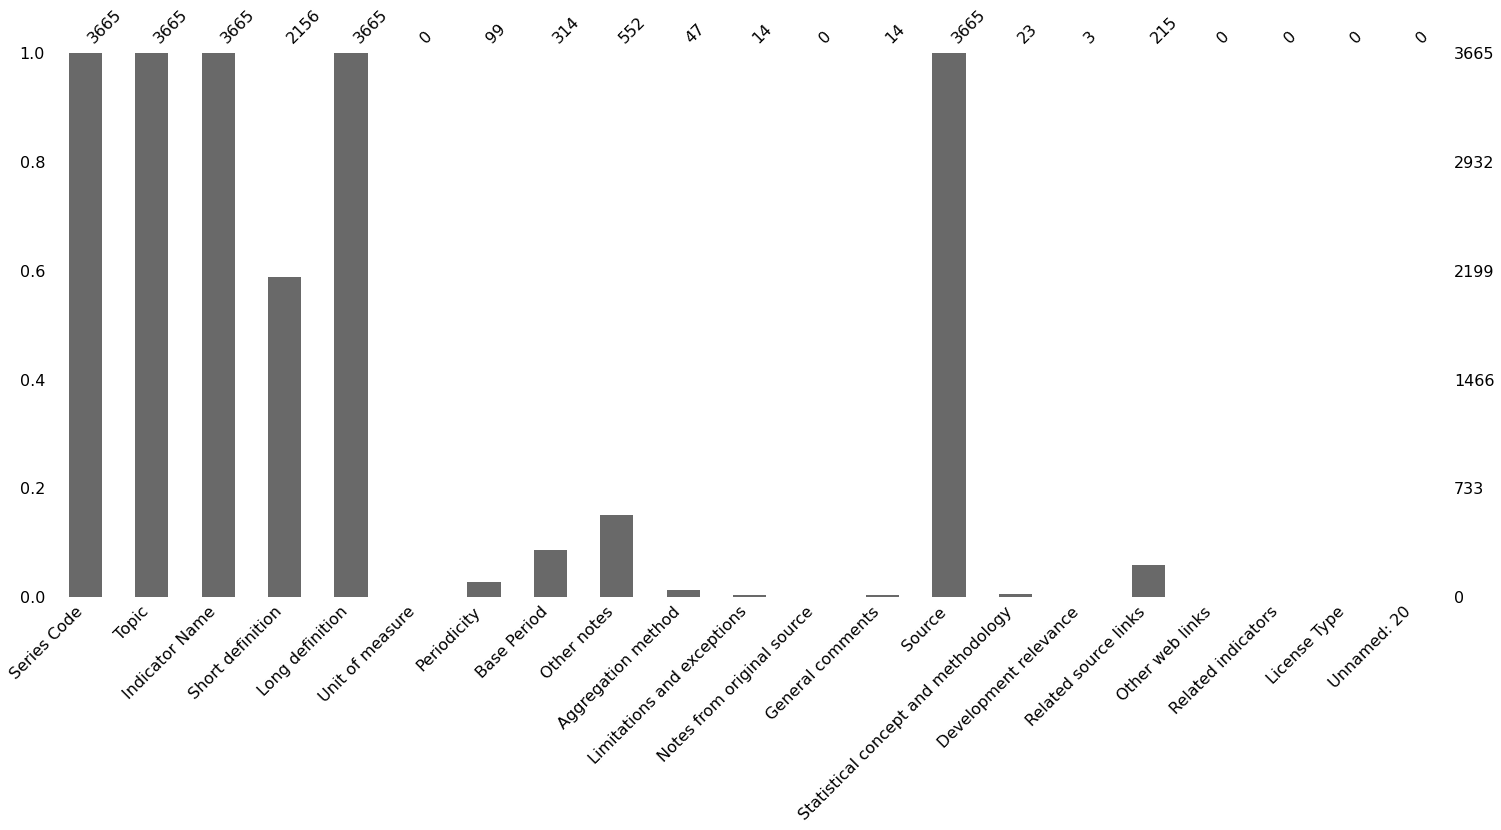

In [41]:
msno.bar(df_five)

<AxesSubplot:>

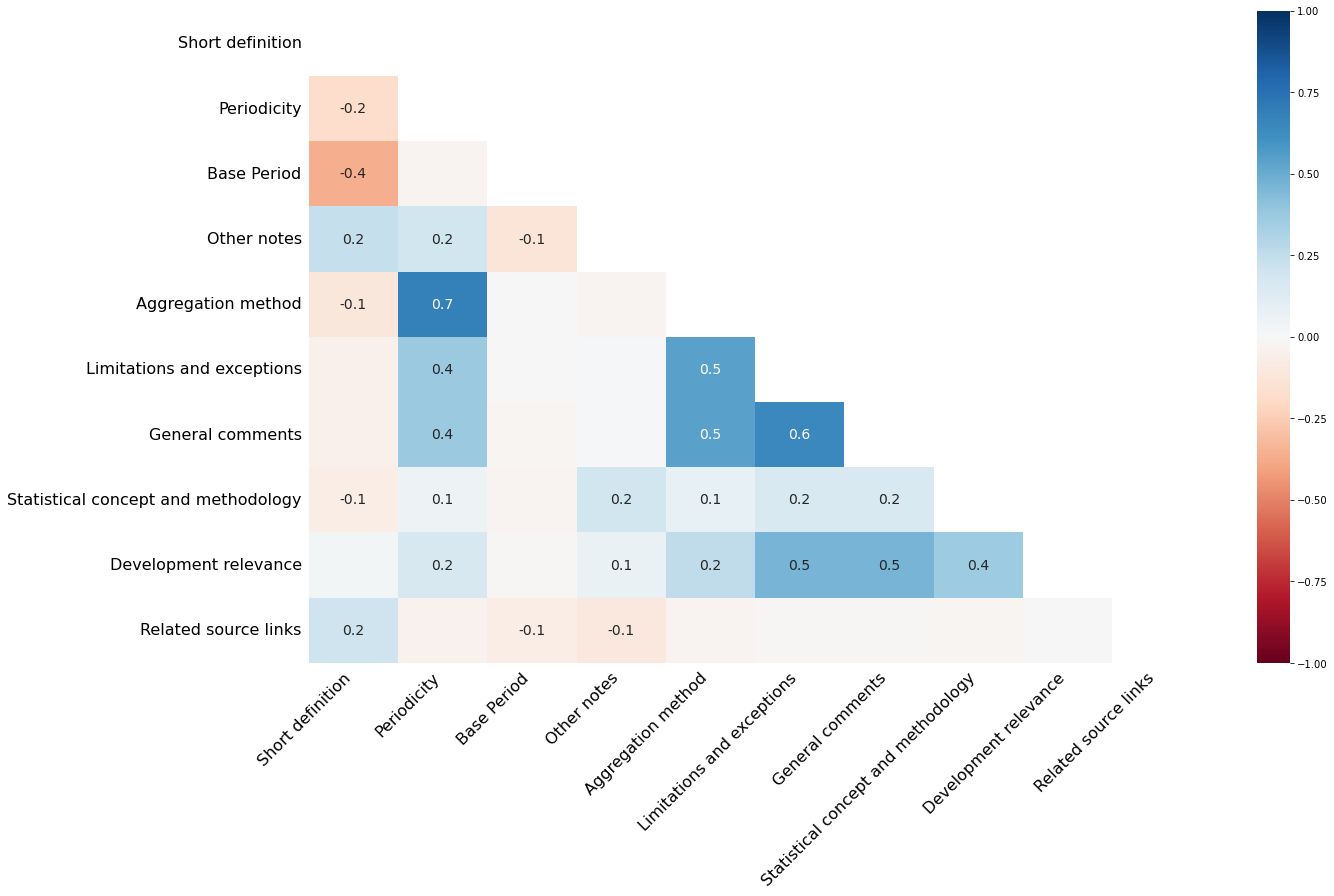

In [42]:
msno.heatmap(df_five)